In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv(r"C:\Users\Asus\Desktop\internship-project\zomato.csv")

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
data.shape

(51717, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### Preprocessing & EDA

In [7]:
# handling missing values
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
# columns with missing features 
features_with_na = [feature for feature in data.columns if data[feature].isnull().sum() > 0]
features_with_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [9]:
# percentage of missing values in each feature 
for feature in features_with_na:
    print("{} has {}% of missing values".format(feature,np.round(data[feature].isnull().sum()/len(data)*100,4)))

rate has 15.0337% of missing values
phone has 2.3358% of missing values
location has 0.0406% of missing values
rest_type has 0.4389% of missing values
dish_liked has 54.2916% of missing values
cuisines has 0.087% of missing values
approx_cost(for two people) has 0.669% of missing values


In [10]:
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
def extract_rate(value):
    """
        This function extracts rate values out of 5 in float format.
        returns nan for values other than numeric.
    """
    if value == "NEW" or value == "-":
        return np.nan
    else:
        value = str(value).split("/")
        value= value[0]
        return float(value)

In [12]:
data['rate'] = data.rate.apply(extract_rate)

In [13]:
data.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [14]:
data.rate.isnull().sum()

10052

There are 10052 nan values in our column rate.
We have 2 approaches:
1. Dropping null values in rate
2. replacing null values with mean

we will try both and see if in which case does our distribution is more normalized.

[Text(0.5, 1.0, 'Rate null dropped')]

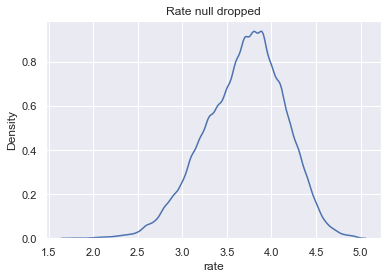

In [15]:
# 1. dropping null
rate_null_dropped = data.rate.dropna()
sns.kdeplot(rate_null_dropped).set(title="Rate null dropped")

[Text(0.5, 1.0, 'Rate null filled with median')]

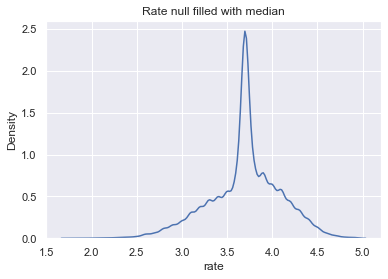

In [16]:
# 2. filling null with median values
rate_null_filled = data.rate.fillna(np.median(data[data.rate.isnull() == False]['rate']))
sns.kdeplot(rate_null_filled).set(title="Rate null filled with median")

We observe that distribution with null dropped values follow a more normal distribution .so we will drop null values in this column

In [17]:
data.rate.dropna(inplace=True)
data.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

Removing unwanted columns
1. url - does not contribute to our analysis
2. address - may play a significant role as location may affect the customers but Location column will work more better than address column.
3. Phone - does not contributr to our analysis
4. dish_liked - since it is an indivisual choice it will not effect much in analysis
5. reviews_list - It contains list of indivisual reviews for restaurants so does not contribute to analysis.
6. menu_item - just contains menu items for indivisual restaurants or empty list.

In [18]:
cols = ['url','address','phone','dish_liked','reviews_list','menu_item']
data.drop(cols,axis=1,inplace=True)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [19]:
 # Renaming our columns according to our ease
new_col_names = {'approx_cost(for two people)':'cost_for_2','listed_in(type)':'type','listed_in(city)':'city'}
data.rename(columns=new_col_names,inplace=True)
data.tail(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_2,type,city
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield","Bar, Casual Dining","Finger Food, North Indian, Continental","1,500",Pubs and bars,Whitefield


In [20]:
# dropping all null values
data.isnull().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
cuisines           45
cost_for_2        346
type                0
city                0
dtype: int64

In [21]:
data.dropna(inplace=True)

In [22]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [23]:
data.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost_for_2      0
type            0
city            0
dtype: int64

### Top 20 restaurants chains in bangalore

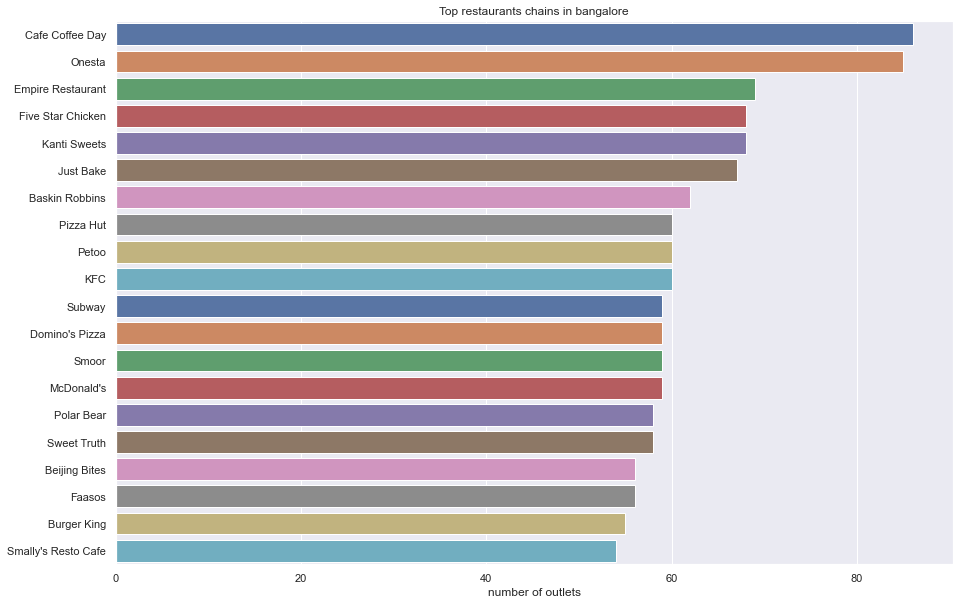

In [24]:
plt.figure(figsize=(15,10))
chains = data['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Top restaurants chains in bangalore")
plt.xlabel("number of outlets")
plt.show()

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41190 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41190 non-null  object 
 1   online_order  41190 non-null  object 
 2   book_table    41190 non-null  object 
 3   rate          41190 non-null  float64
 4   votes         41190 non-null  int64  
 5   location      41190 non-null  object 
 6   rest_type     41190 non-null  object 
 7   cuisines      41190 non-null  object 
 8   cost_for_2    41190 non-null  object 
 9   type          41190 non-null  object 
 10  city          41190 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.8+ MB


### restaurants offering online ordering and table booking facilities

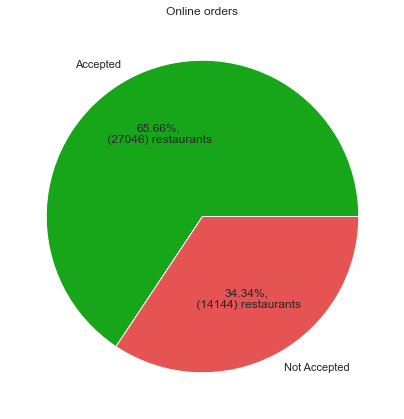

In [26]:
#  Online ordering facilities
x = data.online_order.value_counts()
plt.figure(figsize=(7,8))
plt.pie(x,labels=['Accepted','Not Accepted'],colors=['#17a61a','#e65353'],autopct=lambda p:f'{p:.2f}%,\n ({p*sum(x)/100 :.0f}) restaurants')
plt.title("Online orders")

plt.show()

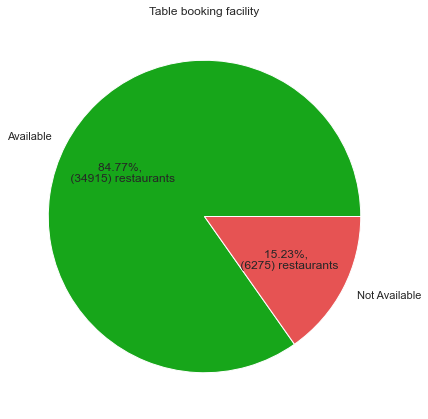

In [27]:
# table booking facalities
x = data.book_table.value_counts()
plt.figure(figsize=(7,8))
plt.pie(x,labels=['Available','Not Available'],colors=['#17a61a','#e65353'],autopct=lambda p:f'{p:.2f}%, \n ({p*sum(x)/100 :.0f}) restaurants')
plt.title("Table booking facility")
plt.show()

### Top voted restaurants

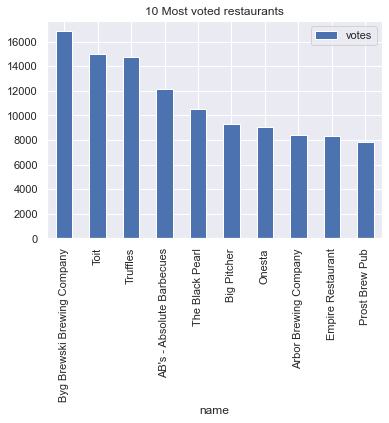

In [28]:
# 20 most voted restaurants
most_voted_restaurants=pd.DataFrame(data.groupby('name')['votes'].max().nlargest(10))
most_voted_restaurants.plot.bar(title="10 Most voted restaurants")

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41190 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41190 non-null  object 
 1   online_order  41190 non-null  object 
 2   book_table    41190 non-null  object 
 3   rate          41190 non-null  float64
 4   votes         41190 non-null  int64  
 5   location      41190 non-null  object 
 6   rest_type     41190 non-null  object 
 7   cuisines      41190 non-null  object 
 8   cost_for_2    41190 non-null  object 
 9   type          41190 non-null  object 
 10  city          41190 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.8+ MB


### Locations with highest numbers of restaurants

In [30]:
data.groupby('location')['name'].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, Pi...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathji's C...
                                           ...                        
West Bangalore                            [FreshMenu, Fit Dish Fetish]
Whitefield           [Imperio Cafe, Night Diaries, AB's - Absolute ...
Wilson Garden        [Tree Top, Sahana's (Nati Style), Karavali Kol...
Yelahanka                    [Prashanth Naati Corner, Cheta's Kitchen]
Yeshwantpur          [Chef's Bank, New Agarwal Bhavan, Fishing Boat...
Name: name, Length: 92, dtype: object

In [31]:
#checking which locations have highest number of restaurants
restaurant=[]
location=[]
for key,location_df in data.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [32]:
loc_res_data = pd.DataFrame(zip(location,restaurant))
loc_res_data.columns=['location','restaurant']
loc_res_data.set_index('location',inplace=True)
loc_res_data=loc_res_data.sort_values(by='restaurant',ascending=False).head(10)

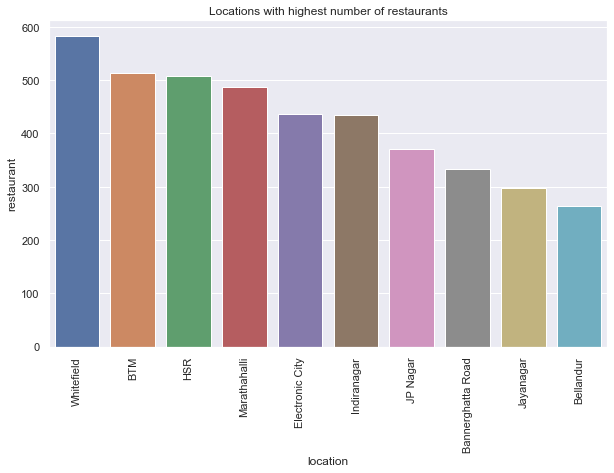

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x=loc_res_data.index,y=loc_res_data['restaurant'])
plt.xticks(rotation=90)
plt.title("Locations with highest number of restaurants")
plt.show()

### Most famous cuisines of Bangalore

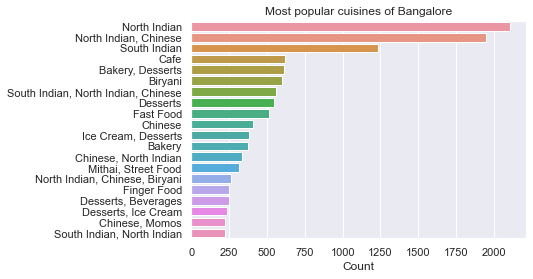

In [34]:
cuisines=data['cuisines'].value_counts()[:20]
plt.figure.figsize=(10,9)
sns.barplot(x=cuisines,y=cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")
plt.show()

### Analysing cost for 2 people

In [35]:
data.cost_for_2.dtype

dtype('O')

In [36]:
# dtype should be float
data.cost_for_2.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

In [37]:
data.cost_for_2= data.cost_for_2.apply(lambda x: float(x.replace(",","")))

In [38]:
data.cost_for_2.dtype

dtype('float64')

In [39]:
# average cost for 2 people
print("Average cost for 2 people in Bangalore = Rs. {}".format(np.round(np.mean(data.cost_for_2),2)))

Average cost for 2 people in Bangalore = Rs. 603.55


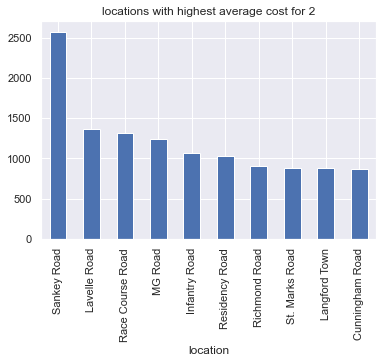

In [40]:
data.groupby('location')['cost_for_2'].mean().nlargest(10).plot.bar(title="locations with highest average cost for 2")

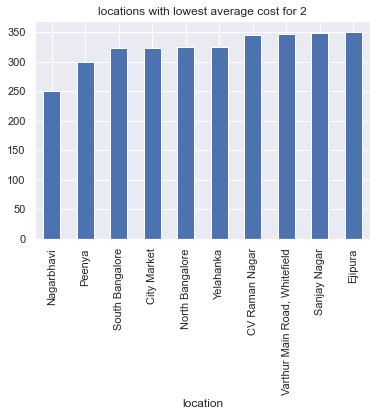

In [41]:
data.groupby('location')['cost_for_2'].mean().nsmallest(10).plot.bar(title="locations with lowest average cost for 2")

### Analysing votes vs ratings

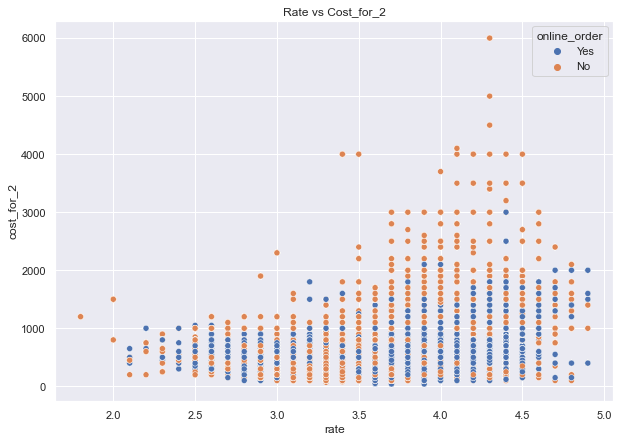

In [42]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='cost_for_2',hue='online_order',data=data)
plt.title("Rate vs Cost_for_2")
plt.show()

We can conclude that highest voted restaurants are accepting online orders and also their cost_for_2 is low / average

### Is there any difference b/w votes of restaurants accepting and not accepting online orders?

[Text(0.5, 1.0, 'votes of restaurants accepting and not accepting online orders')]

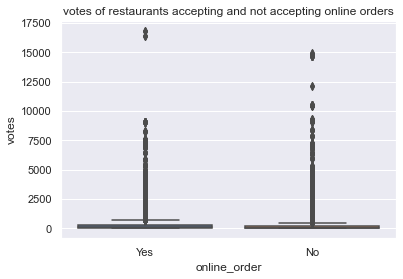

In [43]:
sns.boxplot(x=data.online_order,y=data.votes).set(title="votes of restaurants accepting and not accepting online orders")

we can clearly see from the boxplot that restaurants which accept online orders tend to have higher number of votes because zomato's online ordering provides customers facility to rate the food and restaurant after ordering.

### difference b/w price of restaurants accepting and not accepting online orders

[Text(0.5, 1.0, 'price of restaurants accepting and not accepting online orders')]

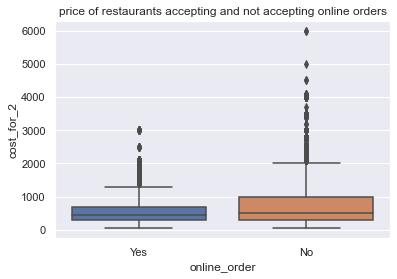

In [44]:
sns.boxplot(x=data.online_order,y=data.cost_for_2).set(title="price of restaurants accepting and not accepting online orders")

so, restaurants which do not provide online ordering facility tend to have higher price range than compared to restaurants which provide online ordering facility.

Restaurants accepting online orders are more affordable than Restaurants who are accepting online orders

## Preprocessing for model building

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41190 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41190 non-null  object 
 1   online_order  41190 non-null  object 
 2   book_table    41190 non-null  object 
 3   rate          41190 non-null  float64
 4   votes         41190 non-null  int64  
 5   location      41190 non-null  object 
 6   rest_type     41190 non-null  object 
 7   cuisines      41190 non-null  object 
 8   cost_for_2    41190 non-null  float64
 9   type          41190 non-null  object 
 10  city          41190 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 5.0+ MB


In [46]:
data["location_en"] = data.location.values
data["rest_type_en"] = data.rest_type.values
data["cuisines_en"] = data.cuisines.values
data["type_en"] = data.type.values
data["city_en"] = data.city.values

In [47]:
# One-Hot encoding catagorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder= LabelEncoder()

data.online_order = encoder.fit_transform(data.online_order)
data.book_table = encoder.fit_transform(data.book_table)
data.location_en = encoder.fit_transform(data.location_en)
data.rest_type_en = encoder.fit_transform(data.rest_type_en)
data.cuisines_en = encoder.fit_transform(data.cuisines_en)
data.type_en = encoder.fit_transform(data.type_en)
data.city_en = encoder.fit_transform(data.city_en)

In [48]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost_for_2', 'type', 'city', 'location_en',
       'rest_type_en', 'cuisines_en', 'type_en', 'city_en'],
      dtype='object')

In [49]:
# making dataframe that canmap catagorical values to their encodings in application

encoding_df = pd.DataFrame(columns=["location","loc_en","rest_type","rest_type_en","cuisines","cuisines_en","type","type_en","city","city_en"])
encoding_df.location = data.location.values
encoding_df.loc_en = data.location_en.values
encoding_df.rest_type = data.rest_type.values
encoding_df.rest_type_en = data.rest_type_en.values
encoding_df.cuisines = data.cuisines.values
encoding_df.cuisines_en = data.cuisines_en.values
encoding_df.type = data.type.values
encoding_df.type_en = data.type_en.values
encoding_df.city = data.city.values
encoding_df.city_en = data.city_en.values

In [50]:
encoding_df

,location,loc_en,rest_type,rest_type_en,cuisines,cuisines_en,type,type_en,city,city_en
0,Banashankari,1,Casual Dining,24,"North Indian, Mughlai, Chinese",1894,Buffet,0,Banashankari,1
1,Banashankari,1,Casual Dining,24,"Chinese, North Indian, Thai",816,Buffet,0,Banashankari,1
2,Banashankari,1,"Cafe, Casual Dining",19,"Cafe, Mexican, Italian",653,Buffet,0,Banashankari,1
3,Banashankari,1,Quick Bites,73,"South Indian, North Indian",2221,Buffet,0,Banashankari,1
4,Basavanagudi,4,Casual Dining,24,"North Indian, Rajasthani",1921,Buffet,0,Banashankari,1
...,...,...,...,...,...,...,...,...,...,...
41185,Whitefield,88,"Casual Dining, Bar",25,"North Indian, Continental",1785,Pubs and bars,6,Whitefield,29
41186,Whitefield,88,"Casual Dining, Bar",25,"Andhra, South Indian, Chinese, North Indian",101,Pubs and bars,6,Whitefield,29
41187,Whitefield,88,Bar,6,Continental,866,Pubs and bars,6,Whitefield,29
41188,"ITPL Main Road, Whitefield",26,Bar,6,Finger Food,1207,Pubs and bars,6,Whitefield,29


In [51]:
# keeping only numerical data that would be used in our model training and predictions
data.drop(columns=['name','location','rest_type','cuisines','type','city'],inplace = True)

In [52]:
data.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'cost_for_2',
       'location_en', 'rest_type_en', 'cuisines_en', 'type_en', 'city_en'],
      dtype='object')

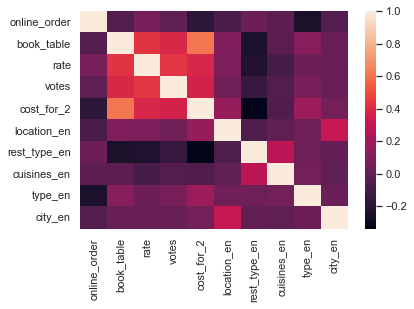

In [53]:
sns.heatmap(data.corr())

## Model Building

In [54]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [55]:
X = data.drop(['rate'],axis=1)
y = data['rate']

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [57]:
lr = LinearRegression()
sgd_reg = SGDRegressor()
xg_reg = XGBRegressor()
ex_tree = ExtraTreesRegressor()
random_reg = RandomForestRegressor()

In [58]:
lr.fit(X_train,y_train)
sgd_reg.fit(X_train,y_train)
xg_reg.fit(X_train,y_train)
ex_tree.fit(X_train,y_train)
random_reg.fit(X_train,y_train)

RandomForestRegressor()

In [59]:
print("linear reg score = {}".format(lr.score(X_train,y_train)))
print("SGD reg score = {}".format(sgd_reg.score(X_train,y_train)))
print("XGB reg score = {}".format(xg_reg.score(X_train,y_train)))
print("extra tree reg score = {}".format(ex_tree.score(X_train,y_train)))
print("Random forest reg score = {}".format(random_reg.score(X_train,y_train)))

linear reg score = 0.30045428907936
SGD reg score = -1.471544367557389e+31
XGB reg score = 0.8089952755689415
extra tree reg score = 0.9998914556859952
Random forest reg score = 0.9851437818878006


Best scores are produced by `extra tree regressor : SCORE -> 0.9998..` , `Random forest regressor : SCORE -> 0.9854..` & `XG Boost regressor : SCORE -> 0.8089..` models on training data.
nNow, evaluating them on basis of test data.

In [60]:
y_pred_ex = ex_tree.predict(X_test)
y_pred_rt = random_reg.predict(X_test)
y_pred_xg = xg_reg.predict(X_test)

In [61]:
## Evaluating MSE
from sklearn.metrics import mean_squared_error

print("MSE Extra Tree Regressor : {}".format(mean_squared_error(y_test,y_pred_ex)))
print("MSE Random Forest Regressor : {}".format(mean_squared_error(y_test,y_pred_rt)))
print("MSE XGB Regressor : {}".format(mean_squared_error(y_test,y_pred_xg)))

MSE Extra Tree Regressor : 0.018345606451850217
MSE Random Forest Regressor : 0.021043226273914622
MSE XGB Regressor : 0.04958297161057411


We are getting minimum error in `Extra tree regressor (0.06..)`  

from corelation heatmap above we can see that rest_type may not be such an import factor in rating of a restaurant . trying droping that feature and modelling if we could see any improvements

In [62]:
X_rest = data.drop(columns=['rate','rest_type_en'])
y_rest = data.rate

In [63]:
x_rtrain,x_rtest,y_rtrain,y_rtest = train_test_split(X_rest,y_rest,test_size=0.33,random_state=42)

In [64]:
etr = ExtraTreesRegressor()
rforest = RandomForestRegressor()
xgreg = XGBRegressor()

In [66]:
etr.fit(x_rtrain,y_rtrain)
rforest.fit(x_rtrain,y_rtrain)
xgreg.fit(x_rtrain,y_rtrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [68]:
print("Extra tree score: {}".format(etr.score(x_rtrain,y_rtrain)))
print("random forest score: {}".format(rforest.score(x_rtrain,y_rtrain)))
print("XGB regressor score: {}".format(xgreg.score(x_rtrain,y_rtrain)))

Extra tree score: 0.9998580574355324
random forest score: 0.984486098696096
XGB regressor score: 0.8021742720143245


In [69]:
y_pred_exr = etr.predict(x_rtest)
y_pred_rtr = rforest.predict(x_rtest)
y_pred_xgr = xgreg.predict(x_rtest)

print("MAE Extra Tree Regressor : {}".format(mean_squared_error(y_test,y_pred_exr)))
print("MAE Random Forest Regressor : {}".format(mean_squared_error(y_test,y_pred_rtr)))
print("MAE XGB Regressor : {}".format(mean_squared_error(y_test,y_pred_xgr)))

MAE Extra Tree Regressor : 0.020610241650114026
MAE Random Forest Regressor : 0.021655521087643393
MAE XGB Regressor : 0.0505246495724804


### Our best performing model is the extra tree classifier `ex_tree` with score(r2) = 0.9998 and MSE = 0.01834

In [70]:
import pickle
pickle.dump(ex_tree,open('model.pkl','wb'))

In [71]:
pickle.dump(encoding_df,open('encoding_df.pkl','wb'))

In [78]:
np.round(ex_tree.predict([[1,0,25,400.0,0,73,413,4,0]])[0],1)

3.7